<h1 style="text-align: center;"><span style="color: #333399;">MIS665 Regression Modeling: Various Regression Techniques</span></h1>
<h6 style="text-align: center;">Created by: Michael Gagliano on 10/18/2018</h6>
<h6 style="text-align: center;">"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.</h6>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
data = pd.read_csv("data/b_housing.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Source: https://archive.ics.uci.edu/ml/datasets/Housing (No longer active/available URL)
<br><br>
This dataset includes housing values in suburbs of Boston and the factors influencing the housing values. You as a data analyst need to analyze the dataset and find out what factors (X variables) influence the housing values. You should use data visualization, exploratory data analysis (e.g., correlation), and multiple line regression.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


<h1 style="text-align: center;"> 1. Business Understanding </h1>

The goal of this homework is to assess the data and determine which of the features are most likely influencing the housing market (MEDV) using multivariable regression techniques (Lasso, Ridge, Statistical Validation re: Multicollinearity).

- H0 (Null Hypothesis): There is no difference in variables and their relationship to MEDV

- HA1 (Alternative Hypothesis #1): PTRATIO, RM, and CRIM will create the most accurate regression model to predict MEDV.

I believe this as they are most indicative of the variables socioeconomic equity/inequity

- HA2 (Alternative Hypothesis #2): TAX is not a good variable to use in multiple regression due to multicollinearity

I believe that TAX will be too directly related to MEDV as a result, not accurately represent the predictability of MEDV.

<h1 style="text-align: center;"> 2a. Preliminary Exploratory Analysis </h1>
#### Figure 1. Correlation Heatmap 

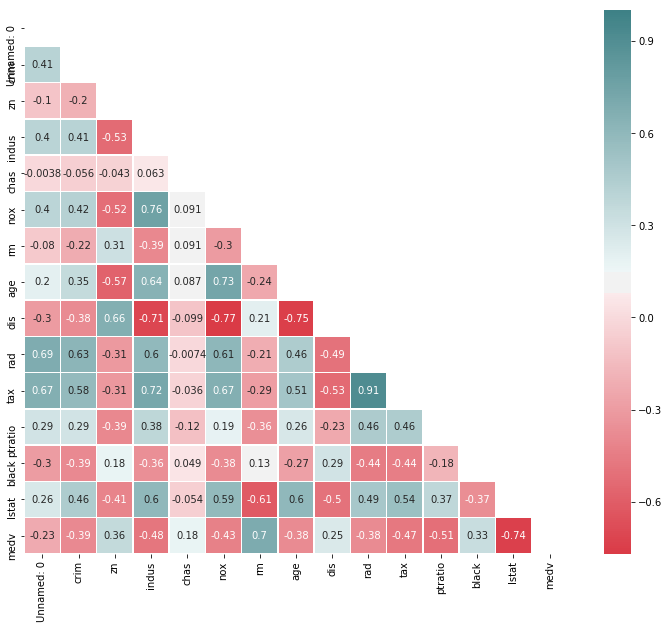

In [61]:
#Correlation Heatmap between Variables

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 200, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1,
            square=True, linewidths=.5);

<i>Figure 1. A correlation heatmap between all variables found in the dataset. Multicollinearity has not yet been assessed/established. 

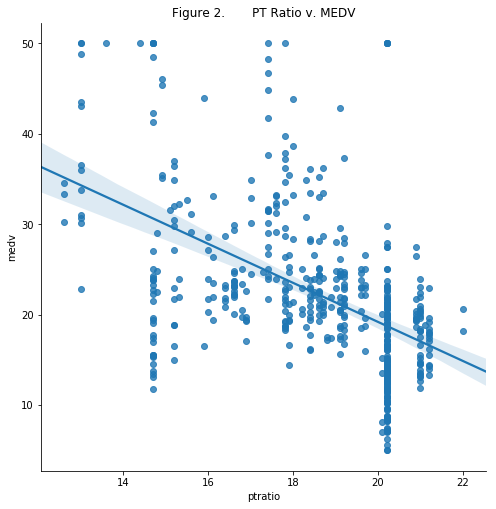

In [62]:
fig.set_size_inches(11.7, 8.27)
sns.lmplot('ptratio', 'medv', data, size = 7)
ax = plt.gca()
ax.set_title("Figure 2.       PT Ratio v. MEDV");

<i>Figure 2. Scatterplot between PT Ratio and MEDV. Regression line with error variance area has also been fitted to data.</i>

C:\Users\Mike Gagliano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mike Gagliano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


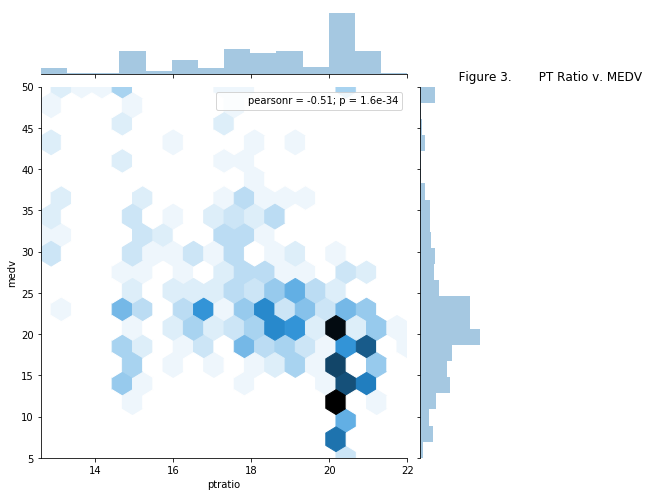

In [63]:
fig.set_size_inches(11.7, 8.27)
sns.jointplot('ptratio', 'medv', data, kind='hex', size = 7)
ax = plt.gca()
ax.set_title("                                                   Figure 3.       PT Ratio v. MEDV");

<i>Figure 3. A joint plot showing both density (hexagonal density plot) and distribution (histogram on outer axes) between PT Ratio and MEDV</i>

<b>Most datapoints seem to aggregate between or around (21, 13) or (21, 23), suggesting that the most common instances fall within the range based on the density.

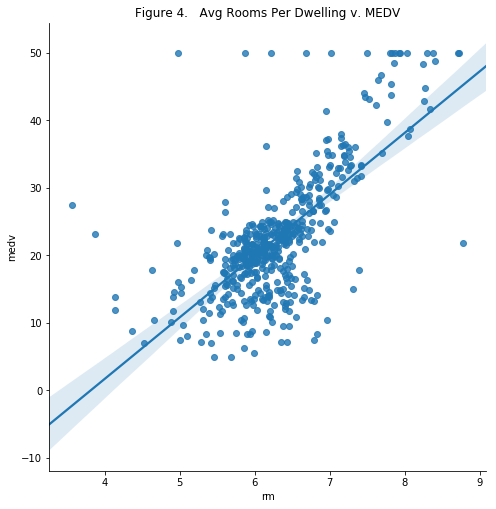

In [64]:
sns.lmplot('rm', 'medv', data, size = 7)
ax = plt.gca()
ax.set_title("Figure 4.   Avg Rooms Per Dwelling v. MEDV");

<i>Figure 4. Scatterplot between Average Number of Rooms per Dwelling and MEDV. Regression line with error variance area has also been fitted to data.</i>

C:\Users\Mike Gagliano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mike Gagliano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


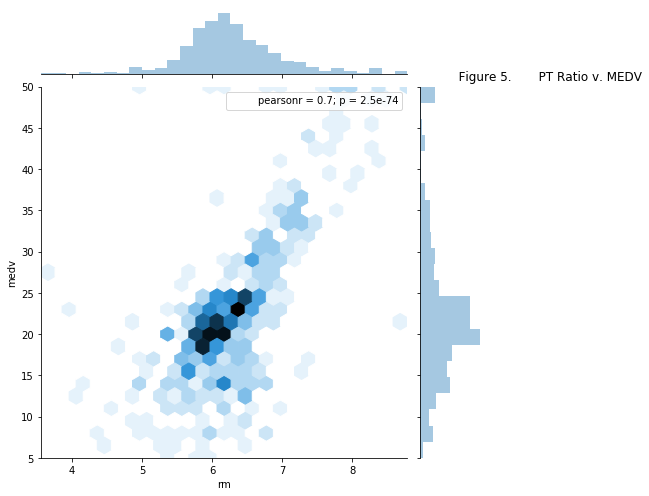

In [65]:
fig.set_size_inches(11.7, 8.27)
sns.jointplot('rm', 'medv', data, kind='hex', size = 7)
ax = plt.gca()
ax.set_title("                                                   Figure 5.       PT Ratio v. MEDV");

<i>Figure 5. A joint plot showing both density (hexagonal density plot) and distribution (histogram on outer axes) between RM and MEDV</i>

<b>The majority of the datapoints create a heavy density around 6 rooms and 17-25 MEDV</b>. Obviously you cannot have partial rooms (like 6.2 and 3.8), but it does reveal a trend about where a majority of the data falls

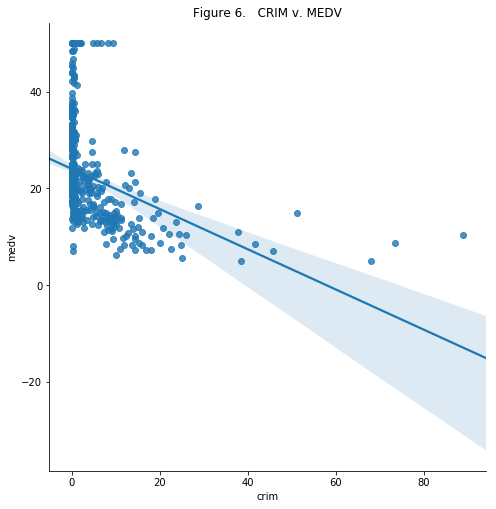

In [66]:
sns.lmplot('crim', 'medv', data, size = 7)
ax = plt.gca()
ax.set_title("Figure 6.   CRIM v. MEDV");

<i>Figure 6. Scatterplot between Crime Per Capita by Town and MEDV. Regression line with error variance area has also been fitted to data.</i>

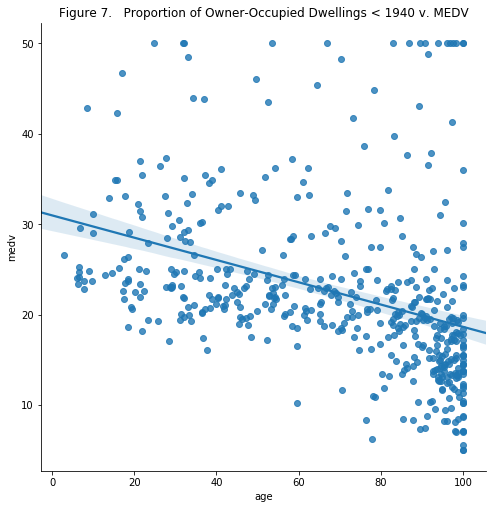

In [67]:
sns.lmplot('age', 'medv', data, size = 7)
ax = plt.gca()
ax.set_title("Figure 7.   Proportion of Owner-Occupied Dwellings < 1940 v. MEDV");

<i>Figure 7. Scatterplot between Proportion of Owner-occupied Units Built Prior to 1940  and MEDV. Regression line with error variance area has also been fitted to data.</i>

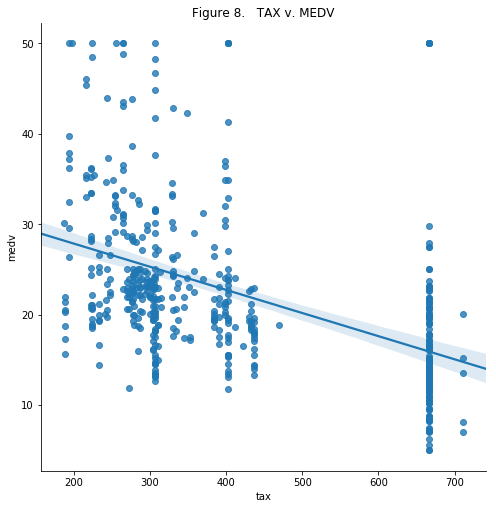

In [68]:
sns.lmplot('tax', 'medv', data, size = 7)
ax = plt.gca()
ax.set_title("Figure 8.   TAX v. MEDV");

<i>Figure 8. Scatterplot between full-value property-tax rate per $10,000 and MEDV. Regression line with error variance area has also been fitted to data.</i>

<h1 style="text-align: center;"><span style="color: red">Preliminary Analysis Summary:</span></h1>

From the variables that were assessed, as stated in the hypotheses (PT Ratio, RM, CRIM, TAX):
    
- All features in this dataset are location-specific (town names). However, in the provided dataset data on the specific Town is not listed.<br><br> 
For Example, CRIM (Crime Per Capita by Town) is not an effective variable to use in single-feature regression analysis as it also factors in geographic location to calculate MEDV. If all the datapoints were from the same town - or better yet - had calculated equal distribution/representation weights for the variables, this may be a better feature to include.
<br><br>
- Many of the variables are categorical, and have some been assigned dummy variables (i.e. CHAS). We would want to prevent using such variables due to perfect multicollinearity in regression between the variables and the predicted output variable (MEDV). 
<br><br>
There are multiple ways to account for this, including Lasso and Ridge Regression techniques. Lasso Regression "penalizes" high coefficient values of the features in the model and setting them to zero if they are deemed non-relevant. Ridge Regression accomplishes the same kind output, although is considered "more gentle" by not setting the coefficients completely to zero. 
<br><br>
- Average Number of Rooms per Dwelling (RM) and Pupil-Teacher Ratio by Town (PT Ratio) both have strong correlations to MEDV, and may both be strong variables when used in multivariable regression to predict MEDV.
<br><br>
- TAX has not been operatively defined so we are unable to determine if external factors such as geographic location, year built, etc. also influence the broad range of values reported. 
<br><br>

- <b> The highest positively correlated variables that seem to influence MEDV are: RM, Black, ZN, and DIS. </b>

- <b> The highest negatively (inversely) correlated variables that seem to influence MEDV are: LSTAT, PTRATIO, INDUS, and TAX

<h1 style="text-align: center;"> 2b. Brief Overview of Regularization Regression Techniques to be Applied </h1>

With a multitude of regression models available, they are all hoping to accomplish the same thing: accurately interpret the data to predict future values. Having these models readily on hand as a Data Analyst/Data Scientist make the computations extremely easy and quick to generate, however, it is still important to understand and select the models that best fit the context of your data.<br><br>

Being able to select a model with a deeper understanding of what is going on "under the black box" allows us to preemptively avoid over/underfitting the data, and controlling for bias within the models.

<b>Regularization:</b> "A standard least squares model tends to have some variance in it, i.e. this model won’t generalize well for a data set different than its training data. <b>Regularization, significantly reduces the variance of the model, without substantial increase in its bias."</b>

<b>Lasso Regression:</b> Lasso Regression "penalizes" features with high-coefficient values, and setting those with low coefficient values to 0; <b>Also known as regularization.</b> Lasso Regression selects features based on their relative weights and can help remove them altogether, which can be a huge benefit in terms of performance, especially in high dimensional datasets. On the flip-side, this is not good when multicollinearity exists. When multicollinearity exists, the model retains only one variable and sets other correlated variables to zero (depending on the value of alpha). That will possibly lead to some loss of information resulting in lower accuracy in our model. 
<br><br>
<b>Ridge Regression:</b> Ridge Regression is essentially the same as Lasso, however it does not remove features. Instead it minimizes the features' coefficients and still retain them in the model. This method helps minimize the impact of multicollinearity, and thus, prevents overfitting that could result from a Lasso Regression model. Due to the small degrees of freedom value for the variables in the dataset, I believe it will likely be the more accurate model. 
<br><br>
<b>f_Regression (Feature Selection):</b> Feature Selection (via SciKit-Learn) is a quick way to utilize a linear model to determine "k" number of best features based on their coefficients. You are able to determine how many features you would like to keep based on their respective scores.<span style="color: red"> <b>This is essentially the equivalent to the LinearRegression( ) classifier that ranks features based on F-Scores, but does not construct a model sequentially. It should be treated as a correlation ranking of single features</b></span>
<br><br>
<b>Recursive Feature Selection (RFE):</b> A different feature selection method (via SkiKit-Learn) that determines feature ranking with recursive feature elimination. 
    
    
<i>Source(s):

- https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

- https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
- https://stats.stackexchange.com/questions/21265/choosing-variables-to-include-in-a-multiple-linear-regression-model   

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
- https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2</i>

<h1 style="text-align: center;"> 3. Multiple Regression Analysis </h1>

I personally would anticipate Ridge Regression to be the most accurate regression model, as it will help minimize the effect of multicollinearity. You can test for multicollinearity pre-emptively using VIF as a <i>relative</i> indicator, as long as you keep in mind that the size of this sample data is very small and the magnitude of the results vs. how they are interpreted can still be subjective. <br><br>

<i>Source(s):

https://stats.stackexchange.com/questions/169445/how-to-interpret-a-vif-of-4

https://stats.stackexchange.com/questions/4099/vif-condition-index-and-eigenvalues

## i. Variance Inflation Factor, or "VIF"

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [88]:
##-- We can add an intercept (Beta_0) to the model if we so choose (which I am)
##-- Remove dtype == str() columns if necessary

X = sm.add_constant(data.drop(['Unnamed: 0'], axis =1)) #Dropping the duplicate index column from dataset

#Caluculating the VIF score of each column within the data
vif_data = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

vif_data = pd.DataFrame(vif_data) #Convert to Dataframe
vif_data.rename(columns= { 0 : 'VIF Score'}, inplace = True) #Rename the column from 0 to VIF Score
vif_data #show the data


,VIF Score
const,645.977937
crim,1.831537
zn,2.352186
indus,3.992503
chas,1.095223
nox,4.586920
rm,2.260374
age,3.100843
dis,4.396007
rad,7.808198


To my own surprise, the VIF scores are all technically well within 'acceptable' ranges (VIF < 10), while RAD and TAX get awfully close. By dropping those two columns I could re-calculate VIF and the magnitude of multicollinearity may drastically change as a result of the small data size. However, I will keep them in at least one model as Ridge Regression will help minimize the effect anyways.

## ii. Multiple Regression Model Development (sans Regularization)

<h3 style="text-align: center;">Model 1: No variables removed</h3> 

In [140]:
#assigning columns to X and Y variables
y = data['medv'] 
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

<h3 style="text-align: center;">Ordinary Least Squares Method via Statsmodels pkg</h3> 
Statsmodels is typically used for traditional statistical analysis (causual analysis and explanation); offers p-value (statistical significance testing)

In [159]:
##--  Multiple Regression Model 1: No variables removed
##--  Ordinary Least Squares Method (OLS)

runs_reg_model1 = ols("medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat", data)
runs_reg1 = runs_reg_model1.fit()

## Sources: 
## Dr. Chae's Instruction Notes
## https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

In [158]:
print(runs_reg1.summary())\

print(np.linalg.cond(runs_reg1.model.exog))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 21 Oct 2018   Prob (F-statistic):          6.72e-135
Time:                        20:15:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

<h3 style="text-align: center;">Ordinary Least Squares Method via SciKit-Learn pkg</h3> 

<body style="text-align: center;">Scikit-Learn is typically used more for machine learning (model deployment and prediction), but useful to compare and contrast against other statistical analysis packages as type of cross-validation</body>

In [153]:
# Building the model below

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [152]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))
print("y-intercept ", model1.intercept_)

mean square error:  21.894831181729206
variance or r-squared:  0.7406426641094094
y-intercept  36.45948838508983


<b>SciKit-Learn does not have a built-in method to calculate/show Adjusted R-Squared. The following solution below has been adapted from Sandipan Dey on Stack Overflow: https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared#</b>

In [162]:
# compute with sklearn linear_model

#model1_y = model1.predict(X)
SS_Residual = sum((y-model1_y)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)
# 0.877643371323 0.863248473832

0.7406426641094092 0.7337897263724626


<b>Using the model developing with ScitKit-Learn, the precision of the models are very close. The R-Squared value and Adjusted R-Squared Values are nearly identical to 3 decimal points at 0.741 and 0.734, respectively.</b>

<span style="color: red"><b>The Durbin-Watson Variable statistic (1.078) falls between 0 < x < 2 and therefore indicates a high level of autocorrelation. Absence of autocorrelation indicates there no correlation between the residual (error) terms. As a result, the Confidence Intervals of each feature has been narrowed and the standard deviation is underestimated from it's true value.</b></span>

<span style="color: red"><b>The Adjusted R-Squared is 0.743 - not good, but not bad. However, many of the variables have their 95% CI over a range of negative values. Also, the Condition Number Calculated was extremely high (15113.517) - this means that for even the smallest of changes in a variables, it will drastically change the output of the dependent variable (MEDV).</b></span>
<br><br>
<b>
This reveals an ill-conditioned and poorly constructed model for the data.

<h3 style="text-align: center;">Visualizing the Multiple Regression Model via ResidualsPlot</h3> 
A Residual Plot is used to visualize the difference between the observed y-value and the predicted y-value; the residual is the vertical distance from the actual plotted point to the point on the regression line. 

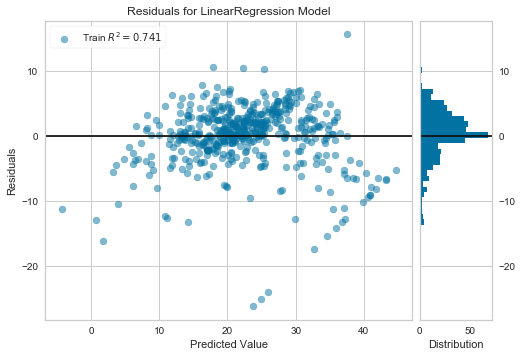

In [175]:
#Visualizing the model

from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model1)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

## iii. Multiple Regression Model Development WITH Regularization

<h3 style="text-align: center;">Model 2: Lasso Method</h3> 

In [178]:
#Lasso Method
model2 = linear_model.Lasso(alpha=0.9) #Aggressive penalizer paramater to reduce features
model2.fit(X, y)
model2_y = model2.predict(X)

#Calculating coeff and zipping the columns to produce some statistics from the model
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

In [179]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))
print("y-intercept ", model2.intercept_)

mean square error:  26.124965173131866
variance or r-squared:  0.6905342036529549
y-intercept  39.34123236753136


<h3 style="text-align: center;">Model 3: Ridge Method</h3> 

In [180]:
#Ridge Method
model3 = linear_model.Ridge(alpha=0.9) #Aggressive penalizer paramater to reduce features
model3.fit(X, y)
model3_y = model3.predict(X)

#Calculating coeff and zipping the columns to produce some statistics from the model
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

In [181]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))
print("y-intercept ", model3.intercept_)

mean square error:  22.026112750369606
variance or r-squared:  0.7390875556177521
y-intercept  31.895866146735546


<h3 style="text-align: center;">Model 4: Feature Selection Method (KBest)</h3> 

In [183]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

<b>RM and LSTAT are the highest scored variables (f-score)</b>

In [184]:
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))
print("y-intercept ", model4.intercept_)

mean square error:  30.51246877729947
variance or r-squared:  0.6385616062603403
y-intercept  -1.3582728118744818


## iv. Summary

- <b> The most accurate multiple regression model was, in fact, the one where Ridge Regression was applied </b>
<br><br>
- Because of the low dimensionality and small datasets, a lot of issues were present from the start. Primarily, autocorrelation that was described and explained above. This limited the accuracy of our models and by reducing features we actually began to quickly underfit the data. We could increase accuracy by increasing the volume of data within the dataset
    

<b> Ridge Regression Model: Actual vs. Predicted

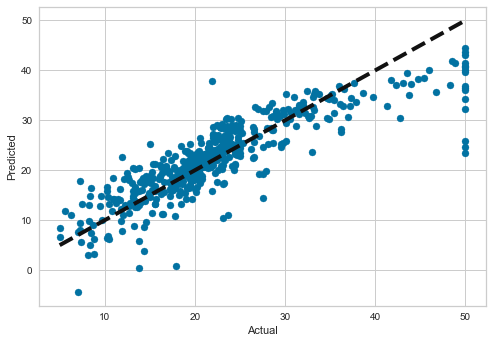

In [188]:
plt.subplots()
plt.scatter(y, model3_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## v. Future Prediction via Model Deployment

In [191]:
#Future Prediction of MEDV via Ridge Regression:
    
scoring = pd.read_csv("data/b_housing_scoringdataset.csv")
columns = scoring[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
pred = model3.predict(columns)
pred

array([30.23685469, 24.81896452, 30.53470444, 28.89188142, 28.16839452,
       25.42486592, 22.96024032, 19.31683462, 11.18279512, 18.82726547,
       18.8259707 , 21.50975469, 20.97954349, 19.9958192 , 19.55721507,
       19.74364888, 21.14730135, 17.14466017, 16.59329579, 18.68191685,
       12.54845369, 17.84543228, 15.96080208, 13.87327918, 15.84087259,
       13.55669234, 15.67651273, 14.87482335, 19.76346986, 21.12465835,
       11.53212494, 18.19449199,  8.86091833, 14.34454471, 13.71993428,
       23.75246966, 22.2963212 , 23.25889898, 23.11461866, 31.49750353,
       34.42619633, 28.23168923, 25.35994662, 24.75906534, 22.87409695,
       21.9860596 , 20.28851892, 17.63150077,  8.54187352, 16.97807243])

## vi. Additional Learning: Random Forest Regression

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = data['medv'] 
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  2.200636363636363
variance or r-squared:  0.9739352756414087


<b>97.3% Accuracy! This is the highest accuracy yet. This would be the best model to deploy in the future.</b>